# Downloading President Pictures

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import random
import os

PATH = "data/presidents/"
PATH_TRAIN = PATH+'train/'
DOWNLOAD_FLAG = False  # Select false if we have already donwloaded the images + labels

if not os.path.exists(PATH_TRAIN):
    os.makedirs(PATH_TRAIN)

In [2]:
# President list from http://textlists.info/history/list-of-all-presidents-of-the-united-states/
presidents = list(map(lambda x: 'President '+x[:-1], open('misc/'+'us_presidents.txt', 'r').readlines()))
# I separate out presidents, as the more recent ones have more useable pictures. For the ones before
# Kennedy, I'll only download 50; after him 100
pres1 = list(set(presidents[:-11]))  # list(set(..)) to remove duplicates; see Grover Cleveland
pres2 = list(set(presidents[-11:]))  

In [3]:
if DOWNLOAD_FLAG:
    
    import download_img_list
        
    lab1, err1 = download_img_list.download_img_list(pres1, PATH_TRAIN, 50)
    lab2, err2 = download_img_list.download_img_list(pres2, PATH_TRAIN, 100)
    
    labels = pd.concat([lab1, lab2])
    
    labels.to_csv(PATH+'labels.csv', index = False)
    
    print('\nPresidents that did not download: ')
    print(err1)
    print(err2)
else:
    labels = pd.read_csv(PATH+'labels.csv')

## Look at the downloaded Images

In [4]:
def showPresident(name, labels = labels, dims = (2, 5), directory = PATH_TRAIN):
    '''Show images of a given president'''
    nrows, ncols = dims
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize =(ncols * 4, nrows * 4))
    fns = list(labels['id'][labels['label'] == name])
    k = 0
    for i in range(nrows):
        for j in range(ncols):
            axes[i, j].imshow(plt.imread(directory+fns[k]), cmap = 'gray')
            axes[i, j].set_title(fns[k])
            k = (k + 1) % (len(fns))

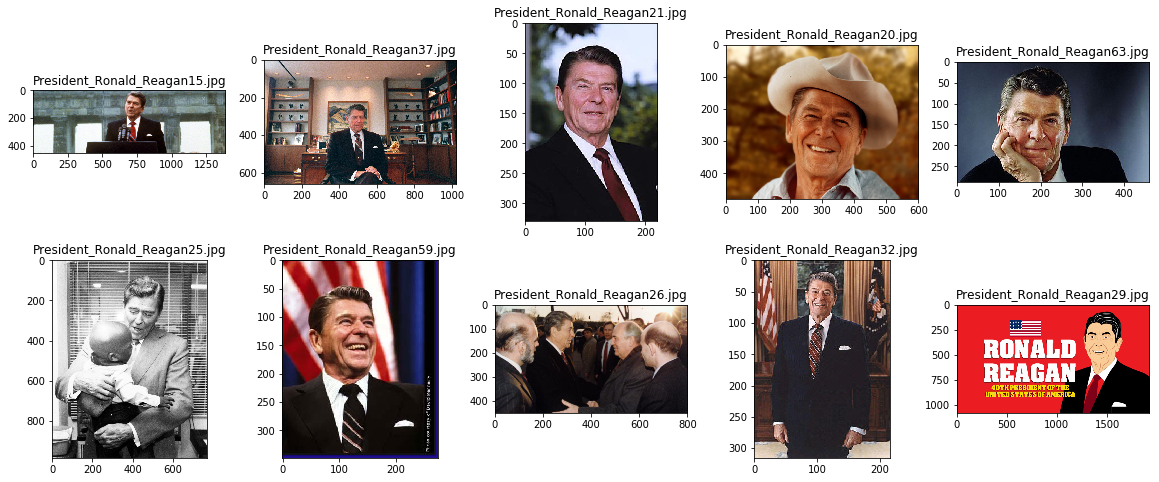

In [7]:
showPresident('President_Ronald_Reagan')